In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sys import path
path.append('./../spineSimulator/')
import plot
from simulation_parameters import simulation_parameters

from importlib import reload
reload(plot)

<module 'plot' from '/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py'>

In [2]:
# text rendering with LaTex
plt.rc('text', usetex=True)
plt.rc('font', family='sans')

In [3]:
(
    x,
    a,
    t,
    phi5,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary('experiment_9')


(
    x,
    a,
    t,
    phi6,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary('experiment_10')

# Figure 04
compare depolarisation for different time courses of spine current input and dendrite depolarisation.

In [4]:
def get_normalized_NMDAR_conductance(a,b):
    
    def g(v):
        return 1. / (1. + a * np.exp(b*v))
    return g

In [5]:
g_NMDAR_CA1 = get_normalized_NMDAR_conductance(a=0.073, b=-0.074)

In [6]:
v = np.linspace(-100, 0,1000)
g = g_NMDAR_CA1(v)

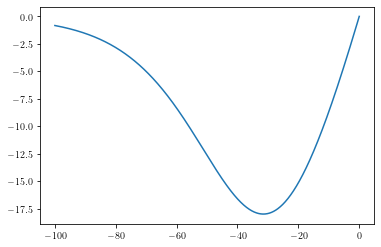

In [7]:
plt.plot(v,g*v)

In [8]:
phi5 = phi5[:,0] * 1.e3
phi6 = phi6[:,0] * 1.e3

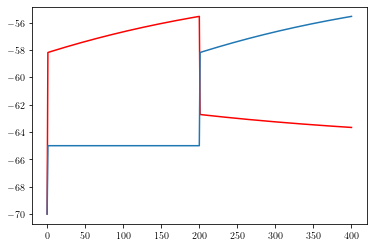

In [9]:
plt.plot(phi5,'r')
plt.plot(phi6)

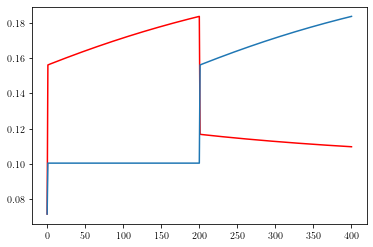

In [10]:
plt.plot(g_NMDAR_CA1(phi5),'r')
plt.plot(g_NMDAR_CA1(phi6))

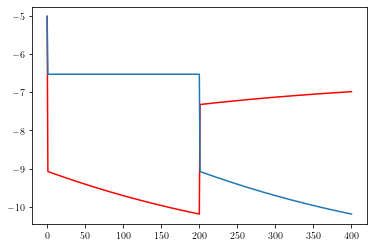

In [11]:
plt.plot(g_NMDAR_CA1(phi5)*phi5,'r')
plt.plot(g_NMDAR_CA1(phi6)*phi6)

In [12]:
np.sum(phi5 * g_NMDAR_CA1(phi5)) 

-3368.7444766773183

In [13]:
np.sum(phi6 * g_NMDAR_CA1(phi6)) 

-3247.075622401591

In [15]:
D_Na = 0.65
D_K = 1.
const_k_B = 1.381e-23  # Boltzmann constant [k_B] = m^2 kg s^-2 K^-1
const_e = 1.602e-19  #
phi_T = const_k_B * 310. / const_e
phi_T * np.log((D_Na*10+D_K*140)/(D_Na*100+D_K*50))

0.006469573202446161

# TODO
Test for three parameters: R_neck, V_head, I_inj
    
    increased R_neck (a_neck): increases decay time constant, increases head depol
    increased V_head (a_head): decreases concentration changes
    increased I_inj (g_syn): increases concentration changes
    
Tip: set bAP volatage comparable to EPSP voltage otherwise i_NMDA will be mainly set by bAP-depol

    a_neck = {15,25,35,45,55}
    a_head = {150,250,350,450}
    g_syn = {10,20,25,30,40,50}

In [77]:
6*4*5

120